In [4]:
import matplotlib.pyplot as plt

In [26]:
scores_game_1 = [1.0/6, 0.0/6, 1.0/6, 1.0/6, 2.0/6, 0.0/6, 0.0/6, 1.0/6, 1.0/6, 1.0/6, 1.0/6, 0.0/6, 1.0/6, 1.0/6, 1.0/6, 1.0/6, 1.0/6, 2.0/6, 2.0/6, 2.0/6]
scores_game_2 = [1.0/3, 1.0/3, 0.0/3, 1.0/3, 1.0/3, 1.0/3, 0.0/3, 1.0/3, 0.0/3, 0.0/3, 1.0/3, 1.0/3, 1.0/3, 2.0/3, 1.0/3, 1.0/3, 1.0/3, 1.0/3, 1.0/3, 1.0/3]
epochs = [i for i in range(1,21)]

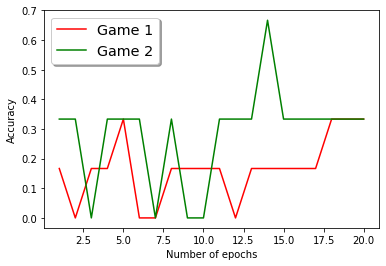

In [27]:
fig, ax = plt.subplots()
ax.plot(epochs, scores_game_1, 'r-', label="Game 1")
ax.plot(epochs, scores_game_2, 'g-', label="Game 2")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")

legend = ax.legend(loc='upper middle', shadow=True, fontsize='x-large')


plt.show()

In [8]:
g1 = []
g2 = []
order = []
with open("./results/rewards.txt",'r',encoding = 'utf-8') as f: 
    for line in f:
        loss = line.strip("\n").split(" ")
        loss = loss[-1].split("/")
        if loss[1] == '6':
            g1.append(float(loss[0])/6)
            order.append(1)
        else:
            g2.append(float(loss[0])/3)
            order.append(2)
epochs = [i for i in range(1,(len(g1)+1))]

g_e1 = []
g_e2 = []
order_e = []
with open("./results/rewards_with_e.txt",'r',encoding = 'utf-8') as f: 
    for line in f:
        loss = line.strip("\n").split(" ")
        loss = loss[-1].split("/")
        if loss[1] == '6':
            g_e1.append(float(loss[0])/6)
            order_e.append(1)
        else:
            g_e2.append(float(loss[0])/3)
            order_e.append(2)

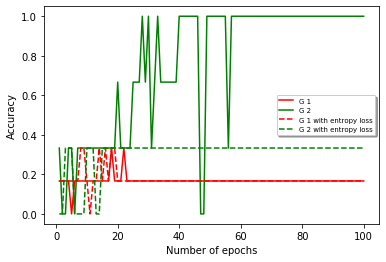

In [12]:
fig, ax = plt.subplots()
ax.plot(epochs, g1, 'r-', label="G 1")
ax.plot(epochs, g2, 'g-', label="G 2")
ax.plot(epochs, g_e1, 'r--', label="G 1 with entropy loss")
ax.plot(epochs, g_e2, 'g--', label="G 2 with entropy loss")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")

legend = ax.legend(loc='right middle', shadow=True, fontsize='x-small')


plt.show()

In [17]:
value_loss1 = []
value_loss2 = []
policy_loss1 = []
policy_loss2 = []
game = 0
curr_id = 0
with open("./results/losses.txt",'r',encoding = 'utf-8') as f: 
    for line in f:
        loss = line.strip("\n").split(" ")
        if curr_id == 0:
            if loss[1] == '1':
                game += 1
                curr_id = 1
        else:
            if loss[1] == '0':
                game += 1
                curr_id = 0
        p_l = float(loss[3])
        v_l = float(loss[5])
        if order[game] == 1:
            value_loss1.append(v_l)
            policy_loss1.append(p_l)
        else:
            value_loss2.append(v_l)
            policy_loss2.append(p_l)

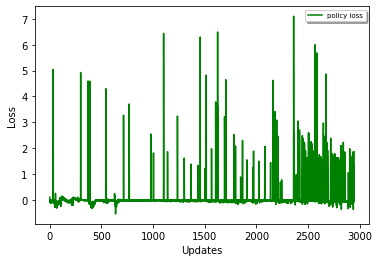

In [28]:
fig, ax = plt.subplots()
# ax.plot(range(len(value_loss2)), value_loss2, 'g-', label="value loss")
ax.plot(range(len(policy_loss2)), policy_loss2, 'g-', label="policy loss")
plt.xlabel("Updates")
plt.ylabel("Loss")

legend = ax.legend(loc='right middle', shadow=True, fontsize='x-small')


plt.show()

In [29]:
value_loss_e1 = []
value_loss_e2 = []
policy_loss_e1 = []
policy_loss_e2 = []
entropy1 = []
entropy2 = []
game = 0
curr_id = 0
with open("./results/losses_with_e.txt",'r',encoding = 'utf-8') as f: 
    for line in f:
        loss = line.strip("\n").split(" ")
        if curr_id == 0:
            if loss[1] == '1':
                game += 1
                curr_id = 1
        else:
            if loss[1] == '0':
                game += 1
                curr_id = 0
        p_l = float(loss[3])
        v_l = float(loss[5])
        e = float(loss[7])
        if order[game] == 1:
            value_loss_e1.append(v_l)
            policy_loss_e1.append(p_l)
            entropy1.append(e)
        else:
            value_loss_e2.append(v_l)
            policy_loss_e2.append(p_l)
            entropy2.append(e)

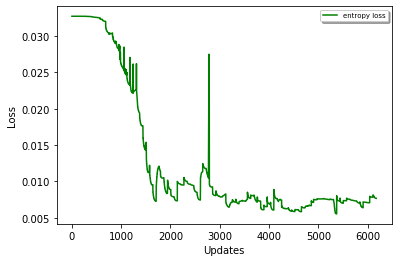

In [36]:
fig, ax = plt.subplots()
# ax.plot(range(len(value_loss_e2)), value_loss_e2, 'g-', label="value loss")
# ax.plot(range(len(policy_loss_e2)), policy_loss_e2, 'g-', label="policy loss")
ax.plot(range(len(entropy2)), entropy2, 'g-', label="entropy loss")
plt.xlabel("Updates")
plt.ylabel("Loss")

legend = ax.legend(loc='right middle', shadow=True, fontsize='x-small')


plt.show()